In [1]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
import numpy as np
import pandas as pd 
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt 
from wordcloud import wordcloud
%matplotlib inline

In [14]:
tweets = pd.read_csv("Elon_musk.csv",encoding='latin-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [16]:
tweets=[Text.strip() for Text in tweets.Text]
tweets=[Text for Text in tweets if Text]
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [59]:
text=' '.join(tweets)
text 

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [60]:
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [19]:
no_punc_text=no_punc_text.lower()
no_punc_text

'kunalb11 i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview gtera27 doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox httpstco9wfkmyu2oj frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy anonyx10 haha thanks  flcnhvy anonyx10 indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u0001f923u0001f923 this is true power haha httpstcofc9uhqsd7o freewal

In [20]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:20])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['kunalb11', 'i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great']


In [21]:
len(text_tokens)

21078

In [22]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:30])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...


['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year']


[nltk_data]   Unzipping corpora\stopwords.zip.


In [23]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:35])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'thought']


In [31]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [33]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:43])

kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox httpstco9wfkmyu2oj frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy anonyx10 haha thanks


In [37]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:37])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail']


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [39]:
print(vectorizer.vocabulary_)

{'kunalb11': 2672, 'alien': 226, 'idaacarmack': 2413, 'ray': 3569, 'trace': 4423, 'cyberpunk': 947, 'hdr': 1653, 'nextlevel': 3118, 'try': 4457, 'joerogan': 2591, 'spotify': 4061, 'great': 1587, 'interview': 2521, 'gtera27': 1606, 'doge': 1100, 'underestimate': 4587, 'teslacn': 4278, 'congratulation': 841, 'tesla': 4272, 'china': 726, 'amazing': 251, 'execution': 1309, 'last': 2690, 'year': 4850, 'next': 3117, 'even': 1279, 'happy': 1635, 'new': 3114, 'ox': 3265, 'httpstco9wfkmyu2oj': 1839, 'frodo': 1472, 'underdoge': 4586, 'thought': 4350, 'would': 4826, 'fail': 1345, 'httpstcozgxjfdzzrm': 2372, 'owensparks': 3262, 'flcnhvy': 1416, 'anonyx10': 279, 'haha': 1621, 'thanks': 4314, 'indeed': 2460, 'tweet': 4476, 'definitely': 1002, 'represent': 3652, 'realworld': 3594, 'time': 4367, 'allocation': 230, 'entertain': 1236, 'outcome': 3242, 'likely': 2750, 'givedirectly': 1556, 'send': 3834, 'agree': 197, 'clubhouse': 767, 'kanyew': 2627, 'httpstco3rwe9uhst': 1777, 'geoffkeighley': 1535, 'unr

In [41]:
print(vectorizer.get_feature_names()[50:150])
print(x.toarray()[50:150])

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th', '4thfromourstar', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727', '727pm', '74', '78', '7th', '90', '9007', '91demigod', '922', '948', '95', '99', '9inety6prince', 'aber', 'able', 'abo', 'aboard', 'abort', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 .

In [42]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_metrix_ngram = vectorizer_ngram_range.fit_transform(tweets)

In [43]:
print(vectorizer_ngram_range.get_feature_names())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']


In [44]:
print(bow_metrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_grams_max_features=TfidfVectorizer(norm="l2",analyzer='word',ngram_range=(1,3),max_features=500)
tf_idf_matrix_n_grams_max_features=vectorizer_n_grams_max_features.fit_transform(tweets)
print(vectorizer_n_grams_max_features.get_feature_names())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

In [48]:
print(tf_idf_matrix_n_grams_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.89309813 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(45,35))
    plt.imshow(wordcloud)
    plt.axis("off")

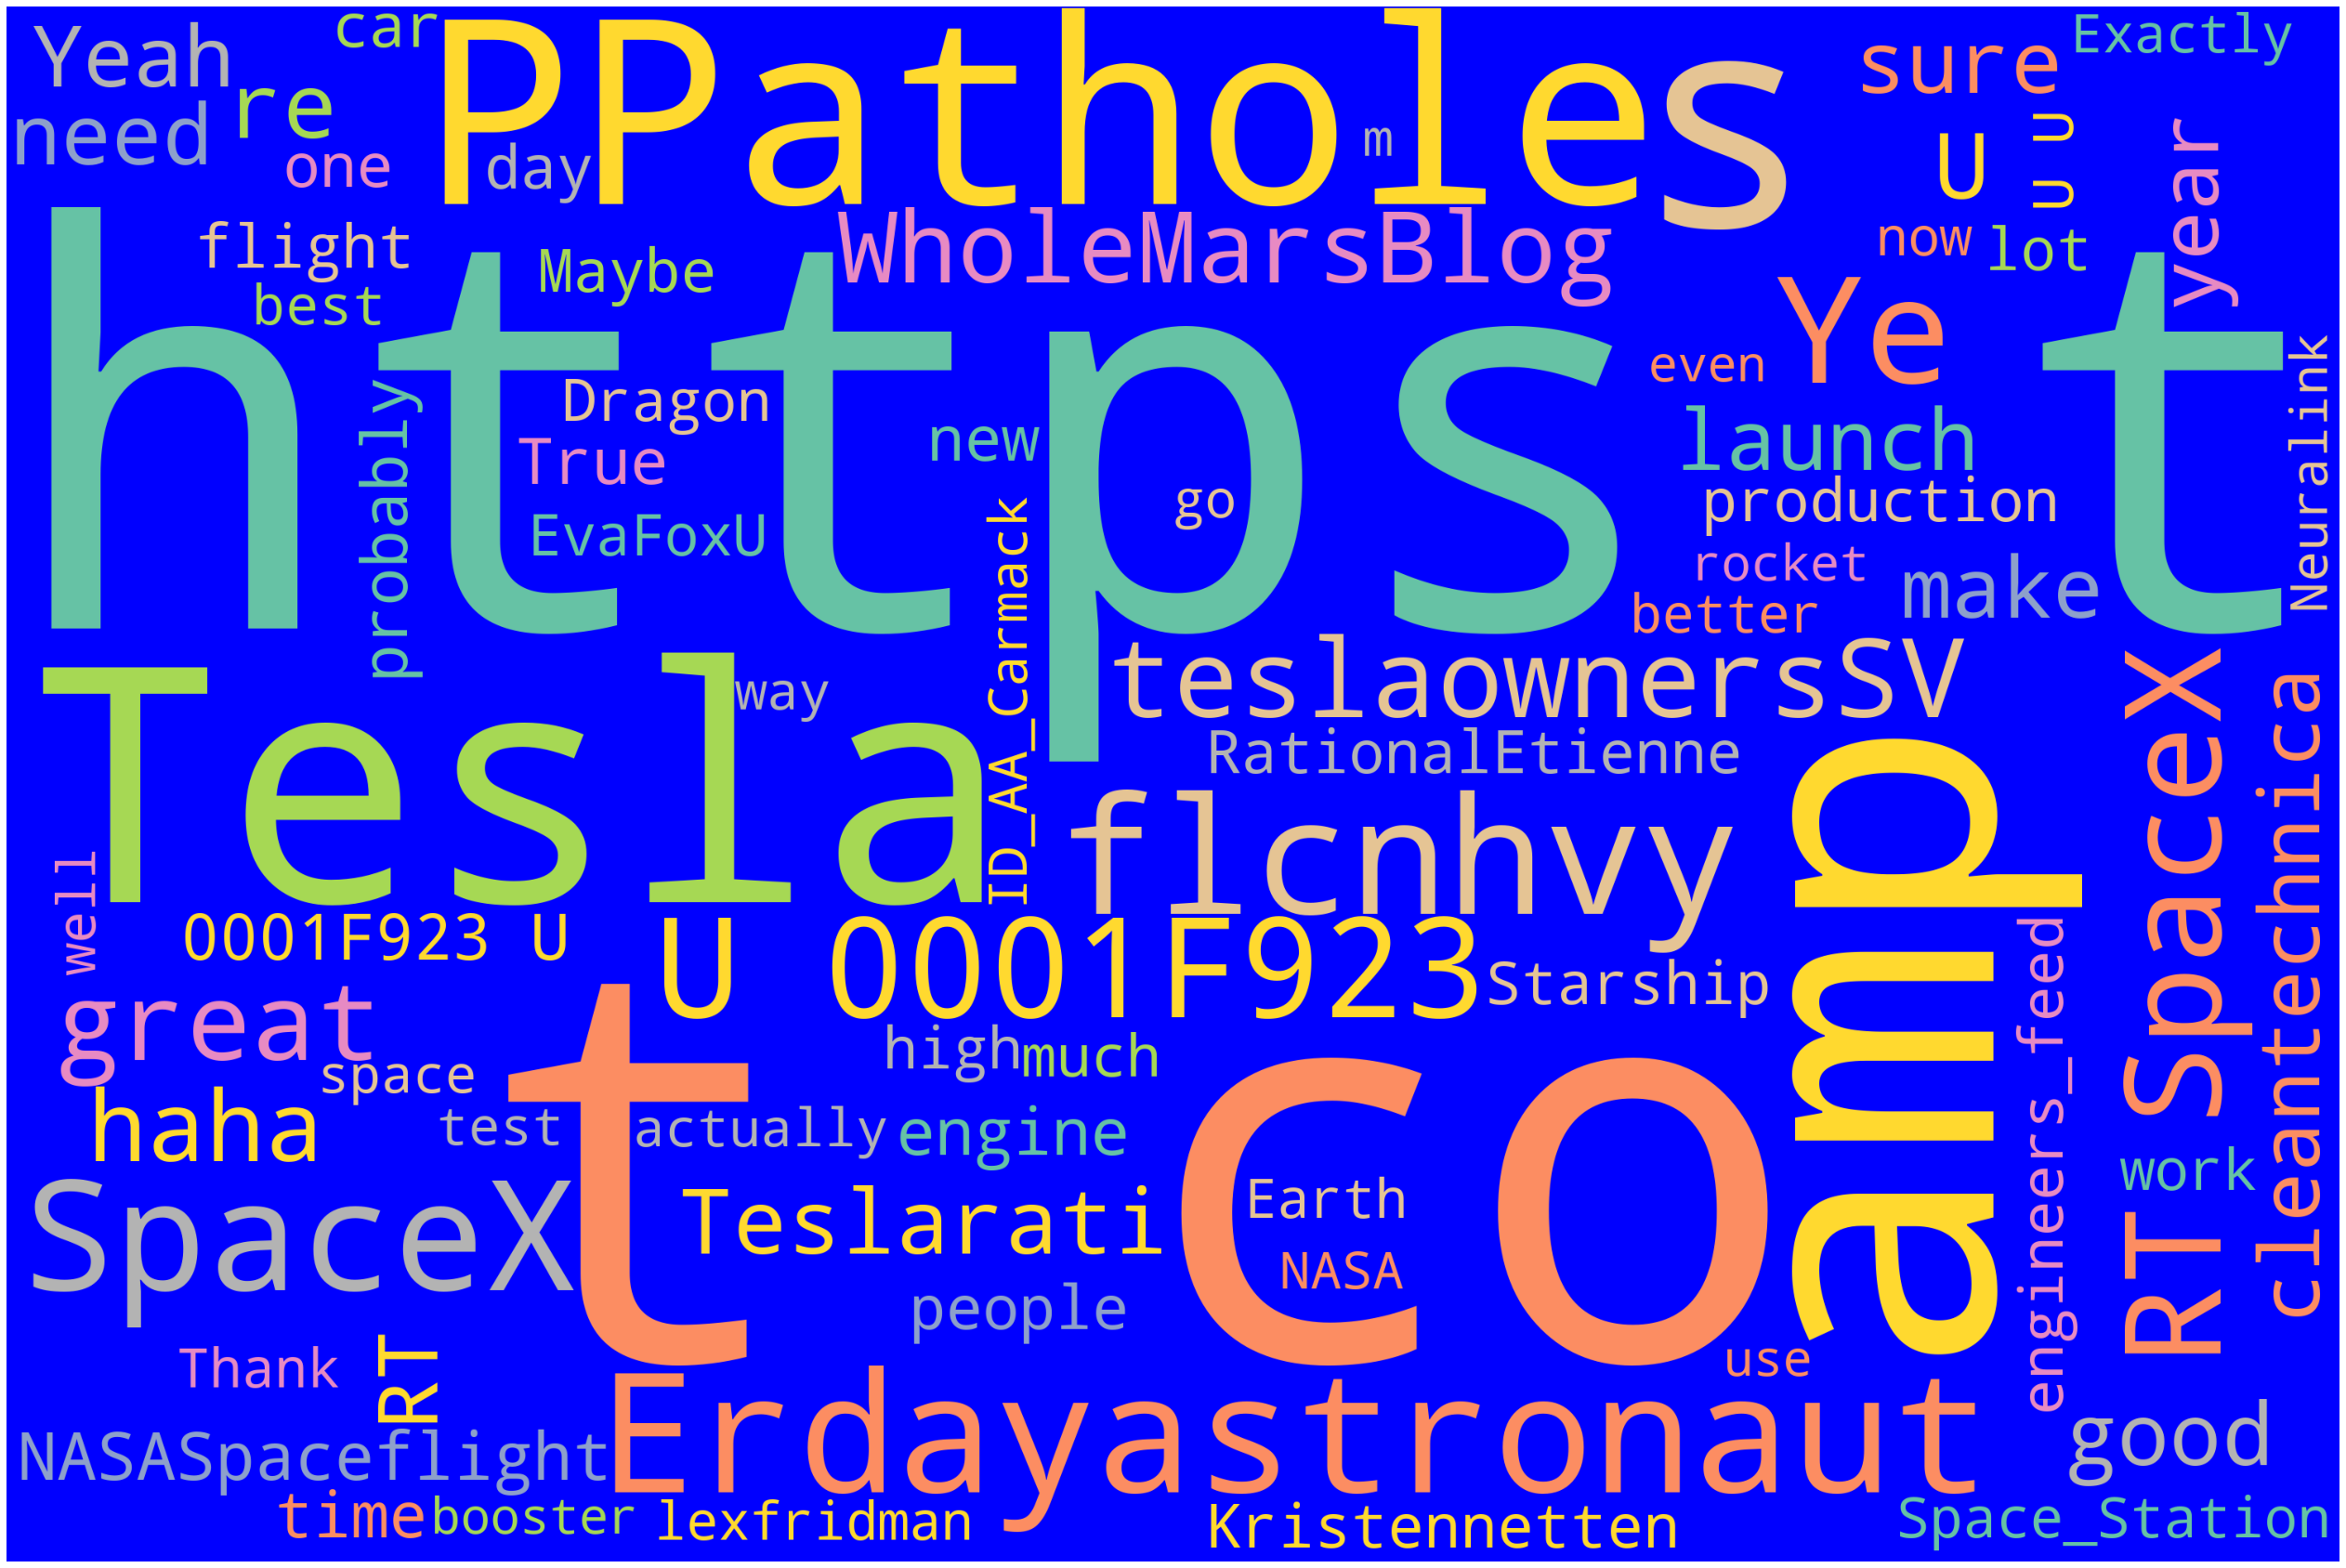

In [61]:
stopwords=STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'blue', max_words=75,
                    colormap='Set2', stopwords=stopwords).generate(text)
plot_cloud(wordcloud)
wordcloud.to_file("wordcloud.png")

# Named Entity Recognition(NER)

In [82]:
nlp=spacy.load('en_core_web_sm')

one_block=text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [83]:
for token in doc_block[100:200]:
    print(token,token.pos_)

most ADV
entertaining ADJ
outcome NOUN
is AUX
the DET
most ADV
likely ADJ
@GiveDirectly ADV
Just ADV
sent VERB
some PRON
Just ADV
agree VERB
to PART
do VERB
Clubhouse NOUN
with ADP
@kanyewest PROPN
https://t.co/3rWE9uHSTS X
@geoffkeighley PROPN
@UnrealEngine PROPN
Its PROPN
getting VERB
real ADV
Bought VERB
some DET
Dogecoin PROPN
for ADP
lil NOUN
X NOUN
, PUNCT
so SCONJ
he PRON
can AUX
be AUX
a DET
toddler NOUN
hodler NOUN
@JoshManMode NOUN
He PRON
definitely ADV
has VERB
issues NOUN
, PUNCT
but CCONJ
the DET
sentencing NOUN
seems VERB
a DET
bit NOUN
high ADJ
@freewalletorg NOUN
Thanks NOUN
for ADP
fixing VERB
@freewalletorg PROPN
Please INTJ
unlock VERB
my PRON
account NOUN
@AstroJordy PROPN
< X
U+0001F923><U+0001F923 PROPN
> X
This PRON
is AUX
true ADJ
power NOUN
haha NOUN
https://t.co/Fc9uhQSd7O PROPN
@freewalletorg PROPN
Any DET
crypto ADJ
wallet NOUN
that SCONJ
wont NOUN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN


In [84]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERBS')]
print(nouns_verbs[100:200])

['rainforests', 'it\x92s', '@itsALLrisky', 'fun', 'crypto', '@genesimmons', 'simplicity', 'genius', '@flcnhvy', '@AstroJordy', 'decades', 'work', 'notes', 'emails', 'texts', 'story', '@TheOnion', 'name', 'years', 'https://t.co/cnOf9yjpF1', '@OwenSparks', '_', 'thing', 'restaurants', 'strangers', 'currency', 'scratch', '@wonderofscience', 'ship', 'burn', 'solution', 'gas', 'maneuvering', 'thrusters', 'turbopump', 'mu', '@brendan2908', 'mission', 'data', 'galaxies', 'Falcon', 'launches', 'Starlink', 'satellites', 'mission', 'pad', 'deck', '@mikko', '@Darudevil', 'default', 'engine', 'lever', 'arm', 'engines', 'min', 'throttle', 'point', 'flameout', 'risk', 'engines', 'shorts', 'Sandstorm', 'masterpiece', 'time', 'method', 'key', 'highs', 'lows', 'need', 'gigachad', 'crypto', 'outcome', 'https://t.co/beY7peFpCj', 'Falcon', 'launch', 'Starlink', 'satellites', 'U+2192', 'https://t.co/bJFjLCzWdK', 'while', 'art', '@eiraum', '_', 'safety', 'communication', 'mission', 'access', 'people', 'astr

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

word_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
word_freq=sorted(word_freq, key=lambda x: x[1], reverse=True)


wd_df=pd.DataFrame(word_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,https,177
1,co,177
2,ppathole,88
3,wholemarsblog,58
4,flcnhvy,42
5,launch,36
6,people,31
7,year,30
8,production,28
9,mission,23


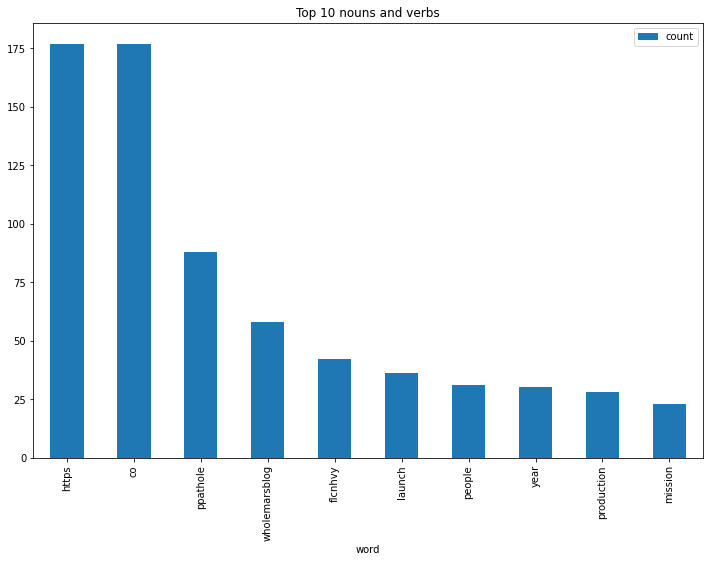

In [87]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Minning

In [88]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [89]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [91]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn 

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [90]:
afinn.shape 

(2477, 2)

In [63]:
afinn.head(16) 

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [93]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [64]:
import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("apple.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] 
book = [x for x in book if x]

b'Skipping line 6: expected 1 fields, saw 14\n'


In [65]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15] 

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [66]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [67]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [68]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [69]:
calculate_sentiment(text = 'amazing') 

4

In [94]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [71]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [72]:
sent_df 

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
182,You can get one of the best movie experiences ...,3,12
183,Overall I would it a 4.5/5.,0,6
184,"I got a great deal on this laptop, which I hav...",3,18
185,I got it not only on discount but also was abl...,0,18


In [73]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
142,Except for not so good sound quality while wat...,5,19
128,Display is too good and it feels like butter o...,5,12
179,great product The elegant work of apple can be...,5,13
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
46,Ships with macOS sierra but update is availabl...,6,86
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [74]:
sent_df['sentiment_value'].describe() 

count    187.000000
mean       0.903743
std        3.387411
min      -11.000000
25%       -1.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [75]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [76]:
sent_df[sent_df['sentiment_value']>=20].head() 

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [95]:
sent_df['index']=range(0,len(sent_df)) 
sent_df['index']

0        0
1        1
2        2
3        3
4        4
      ... 
919    919
920    920
921    921
922    922
923    923
Name: index, Length: 924, dtype: int32

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

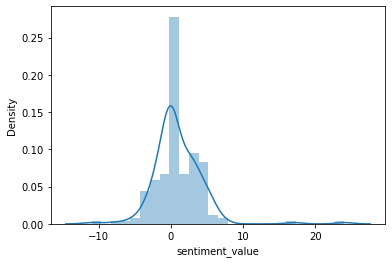

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

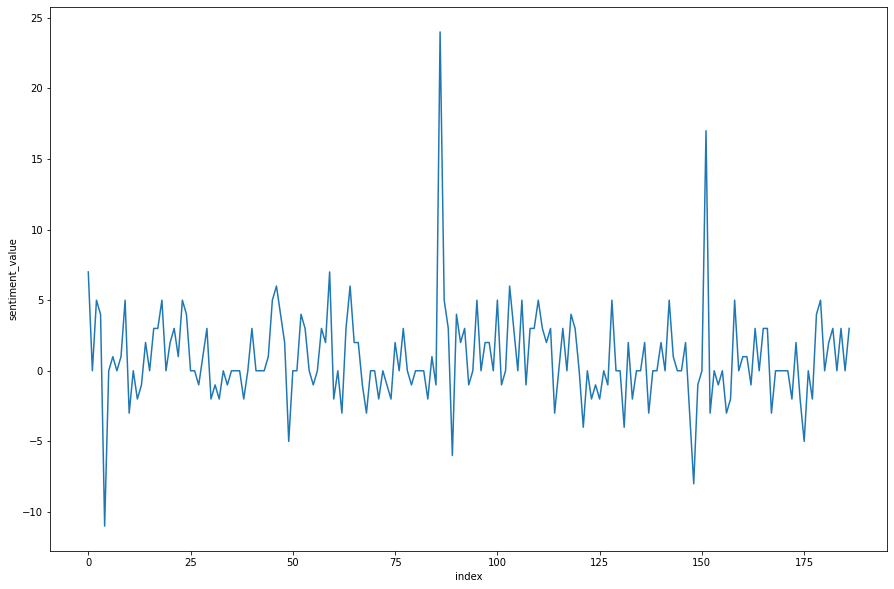

In [79]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

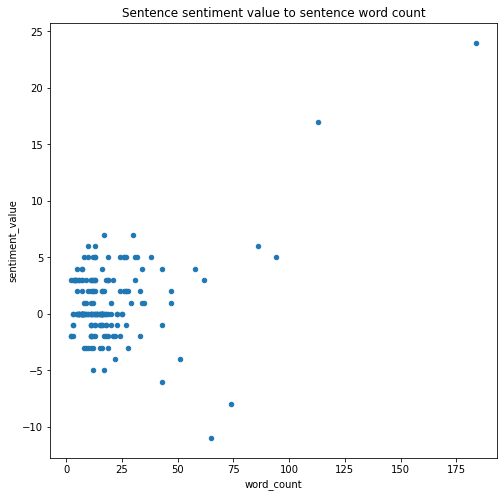

In [80]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')